In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class LinearRegression:
    
    def __init__(self, eta=0.01, reg='l2', reg_coeff=0.01, n_iter=1000, th=1e-3 ):
        self.eta = eta
        self.reg = reg
        self.reg_coeff = reg_coeff
        self.n_iter = n_iter
        self.th = th
        self.w = None
        self.mse = None
        
    def fit(self, X, y):
        
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        N, D = X.shape
        
        self.w = np.zeros(D)
        self.mse = []
        
        for j in range(self.n_iter):
            err = 0
            for i in range(N):
                y_pred = np.dot(X[i],self.w)
                d = y_pred - y[i]
                
                if self.reg == 'l1':
                    dw = (np.dot(X[i].T,d) + self.reg_coeff * np.sign(self.w))
                else:
                    dw = (np.dot(X[i].T,d) + self.reg_coeff * self.w)
                    
                self.w -= self.eta * dw
                err+=np.square(d)
                
            self.mse.append(err/N)
            if j!=0:
                if (self.mse[j-1] - self.mse[j]) < self.th:
                    break
        
    def predict(self, X):
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        y_pred = np.dot(X, self.w)
        return y_pred
    
    def metrics(self, X, y):
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        y_pred = np.dot(X, self.w)
        d = y-y_pred
        mse=np.mean(d**2)
        mae=np.mean(abs(d))
        rmse=np.sqrt(mse)
        r2=1-(sum(d**2)/sum((y-np.mean(y))**2))
        print("MSE = {}".format(mse))
        print("MAE = {}".format(mae))
        print("RMSE = {}".format(rmse))
        print("R_squared = {}".format(r2))
        
    def score(self, X, y):
        v = np.ones((X.shape[0],1))
        X = np.c_[v,X]
        y_pred = np.dot(X, self.w)
        d = y-y_pred
        r2 = 1-(sum(d**2)/sum((y-np.mean(y))**2))
        return r2
        
    def weights(self):
        return self.w
    
    def error(self):
        return np.array(self.mse)

In [3]:
df=pd.read_csv(r"Fish.csv")

In [4]:
X=df.iloc[:,df.columns !='Weight']
y=df.iloc[:,df.columns =='Weight']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3 , random_state=100)

In [6]:
from feature_engine.encoding import OneHotEncoder
encoder=OneHotEncoder(variables=['Species'] ,drop_last=True)
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [8]:
y_train=y_train.values
y_test=y_test.values

In [9]:
y_train=y_train.reshape(-1)
y_test=y_test.reshape(-1)

In [10]:
clf = LinearRegression()
clf.fit(X_train, y_train)
clf.metrics(X_test,y_test)

MSE = 8124.100011004218
MAE = 70.89194510750913
RMSE = 90.13378950762149
R_squared = 0.9242364895080807


In [11]:
w = clf.weights()
w

array([ 387.28557262,  128.27968249,  158.4844008 ,  148.40815629,
         19.0940204 ,    4.0173463 ,   -9.21425662,   10.67722269,
         -2.43175086, -100.37174784,   74.06331238,   18.53668035])

In [12]:
mse = clf.error()
mse

array([101003.30557271,  21835.35227292,  13949.16257375,  12397.14142821,
        11875.27880592,  11611.17303138,  11437.24366153,  11303.04708935,
        11190.45621311,  11092.10927318,  11004.55758713,  10925.87766218,
        10854.79982265,  10790.37498881,  10731.83813329,  10678.5463547 ,
        10629.94690374,  10585.55825573,  10544.95749703,  10507.77114604,
        10473.66806149,  10442.35374188,  10413.56561964,  10387.06910506,
        10362.65421729,  10340.13268853,  10319.33545767,  10300.11048999,
        10282.32087273,  10265.84314645,  10250.56583918,  10236.38817599,
        10223.21894066,  10210.97547002,  10199.58276401,  10188.97269691,
        10179.08331752,  10169.85822712,  10161.24602613,  10153.19982105,
        10145.67678472,  10138.63776358,  10132.04692649,  10125.87145044,
        10120.08123877,  10114.64866847,  10109.54836315,  10104.75698891,
        10100.2530706 ,  10096.01682627,  10092.03001779,  10088.27581608,
        10084.73867917,  

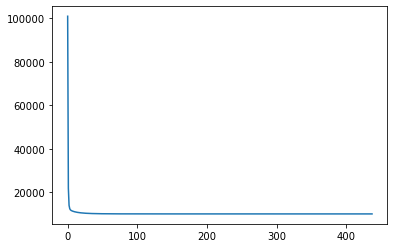

In [13]:
plt.plot(mse)

### Effect of n_iter on Linear Regression

In [14]:
train=[]
test=[]
for i in range(100,1001,100):
    print('For i =',i)
    clf = LinearRegression(n_iter = i)
    clf.fit(X_train,y_train)
    print('Training Score =',clf.score(X_train,y_train))
    print('Testing Score =',clf.score(X_test,y_test))
    train.append(round(clf.score(X_train,y_train),3))
    test.append(round(clf.score(X_test,y_test),3))
    print('***************************************************')

For i = 100
Training Score = 0.9332118142041816
Testing Score = 0.9243063759145758
***************************************************
For i = 200
Training Score = 0.933251837190709
Testing Score = 0.9242218866990887
***************************************************
For i = 300
Training Score = 0.9332562213707905
Testing Score = 0.9242305995885537
***************************************************
For i = 400
Training Score = 0.9332574847417567
Testing Score = 0.9242355861800304
***************************************************
For i = 500
Training Score = 0.9332576886619072
Testing Score = 0.9242364895080807
***************************************************
For i = 600
Training Score = 0.9332576886619072
Testing Score = 0.9242364895080807
***************************************************
For i = 700
Training Score = 0.9332576886619072
Testing Score = 0.9242364895080807
***************************************************
For i = 800
Training Score = 0.9332576886619072
Testing 

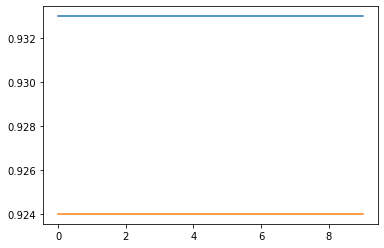

In [15]:
plt.plot(train)
plt.plot(test)

### Effect of type of regularization on model

In [16]:
train=[]
test=[]
reg = ['l1','l2']
for i in reg:
    print('For reg =',i)
    clf = LinearRegression(reg = i)
    clf.fit(X_train,y_train)
    print('Training Score =',clf.score(X_train,y_train))
    print('Testing Score =',clf.score(X_test,y_test))
    train.append(round(clf.score(X_train,y_train),3))
    test.append(round(clf.score(X_test,y_test),3))
    print('***************************************************')

For reg = l1
Training Score = 0.9345077433099719
Testing Score = 0.9209117650857908
***************************************************
For reg = l2
Training Score = 0.9332576886619072
Testing Score = 0.9242364895080807
***************************************************


### Using regularization to supress impact of outliers

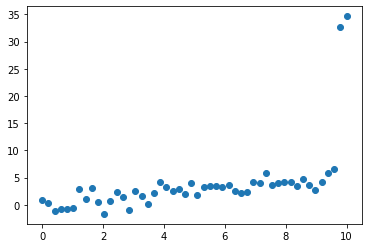

In [17]:
N = 50

# generate the data
X = np.linspace(0,10,N)
Y = 0.5*X + np.random.randn(N)

# make outliers
Y[-1] += 30
Y[-2] += 30

# plot the data
plt.scatter(X, Y)
plt.show()

In [18]:
X.shape,Y.shape

((50,), (50,))

In [19]:
w = {}
for i in [0,10,100]:
    clf = LinearRegression(reg_coeff = i)
    clf.fit(X, Y)
    w[i] = clf.weights()

In [20]:
w

{0: array([-0.27450321,  3.49507065]),
 10: array([0.32543963, 3.11605577]),
 100: array([0.05311006, 0.53110059])}

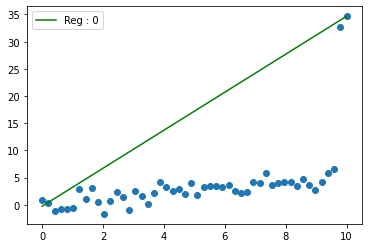

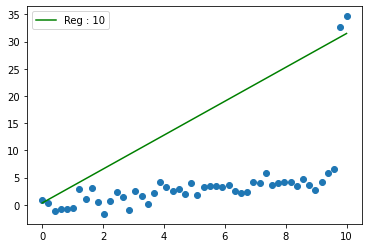

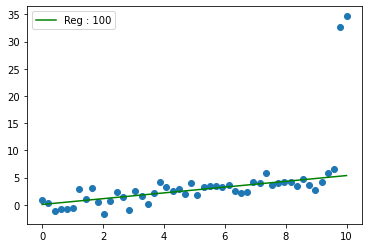

In [21]:
l = list(w.keys())
x = np.vstack([np.ones(N), X]).T
for i in range(len(w)):
    y_pred = x.dot(w[l[i]])
    plt.scatter(x[:,1], Y)
    plt.plot(x[:,1], y_pred, label='Reg : '+str(l[i]),color='g')
    plt.legend()
    plt.show()